# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

nf-core/differentialabundance

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

Sham_oxy_1	Sham_oxy_2	Sham_oxy_3	Sham_oxy_4	Sham_Sal_1	Sham_Sal_2	Sham_Sal_3	Sham_Sal_4	SNI_oxy_1	SNI_oxy_2	SNI_oxy_3	SNI_oxy_4	SNI_Sal_1	SNI_Sal_2	SNI_Sal_3	SNI_Sal_4

In [1]:
import pandas as pd

# Define the sample data
data = {
    "sample": [
        "SNI_Sal_rep1", "SNI_Sal_rep2", "SNI_Sal_rep3",
        "SNI_oxy_rep1", "SNI_oxy_rep2", "SNI_oxy_rep3",
        "Sham_Sal_rep1", "Sham_Sal_rep2", "Sham_Sal_rep3",
        "Sham_oxy_rep1", "Sham_oxy_rep2", "Sham_oxy_rep3"
    ],
    "Condition": [
        "SNI_Sal", "SNI_Sal", "SNI_Sal",
        "SNI_oxy", "SNI_oxy", "SNI_oxy",
        "Sham_Sal", "Sham_Sal", "Sham_Sal",
        "Sham_oxy", "Sham_oxy", "Sham_oxy"
    ]
}

df = pd.DataFrame(data)

# Save to CSV
out_file = "samplesheet.csv"
df.to_csv(out_file, index=False)

out_file


'samplesheet.csv'

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [ ]:
!nextflow run nf-core/differentialabundance -r 1.5.0\
     --input "samplesheet.csv" \
     --contrasts "data/contrasts.csv" \
     --matrix "data/salmon.merged.gene_counts.tsv" \
     -profile docker,arm \
     --max_memory "4.GB" \
     --outdir output_differential \
     -resume 
     


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [nasty_laplace] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : nasty_laplace
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /Users/leoniewehnert/Desktop/computa

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

- input "samplesheet_2.csv"; The pipeline needs to know which sample belongs to which biological condition, contains names and condition
- contrasts "data/contrasts.csv": specifying which comparisons (contrasts) should be tested for differential abundance.
- matrix "data/salmon.merged.gene_counts.tsv"; The raw input data for differential abundance analysis (from Salmon)
- outdir output_differential 
- profile test,docker


What were the outputs of the pipeline?

The main output is a study.html file that contains a smmary of the data, exploratory analysis resulst and a method part that describes what has been done

Would you exclude any samples? If yes, which and why?
Although the PCA plot shows that SNI_Sal_2 and SNI_Sal_4 are distant from the other SNI_Sal samples, no outliers were detected using the median absolute deviation method within each condition. Therefore, I kept these samples for further analysis. Their separation could reflect biological rather than technical variation.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions? <br>
For the adjusted values:

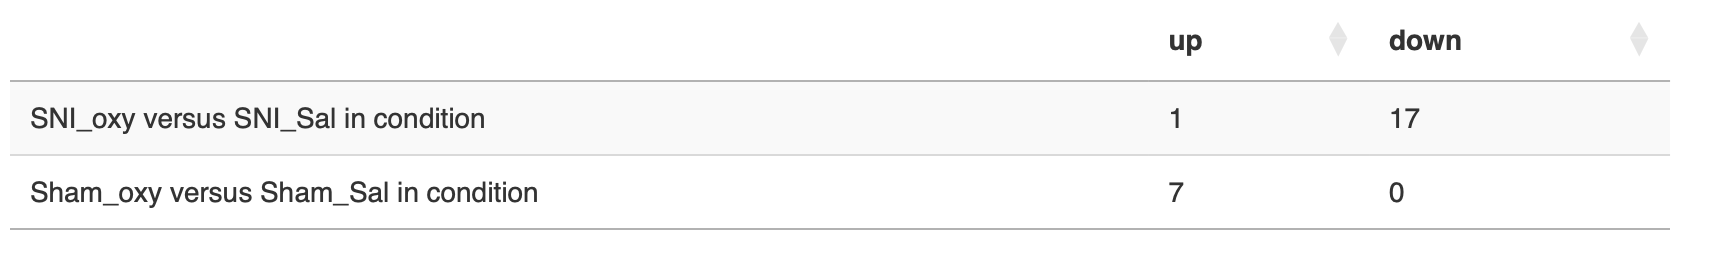

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

- NAc (Nucleus Accumbens) <br>
Part of the ventral striatum, located deep within the forebrain. Plays a key role in reward, motivation, and reinforcement learning.
- mPFC (Medial Prefrontal Cortex) <br>
Located in the frontal lobe. Involved in functions such as decision-making, emotional regulation, attention, and social behavior.
- VTA (Ventral Tegmental Area) <br>
A midbrain region that contains many dopaminergic neurons. Major source of dopamine projections to the NAc and mPFC (the so-called mesocorticolimbic dopamine system).
Central to reward processing, reinforcement, and addiction-related behaviors.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

From the paper itself, we cannot get the complete lists of DEGs in each brain region, only representative examples and pathway-associated subsets. 

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

The publication shows that while differential expression lists are a starting point, they are not sufficient on their own. The authors complemented DEG lists with pathway and regulator analyses, and then validated their predictions experimentally. This approach is necessary to move from gene lists to relevant biological interpretations.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

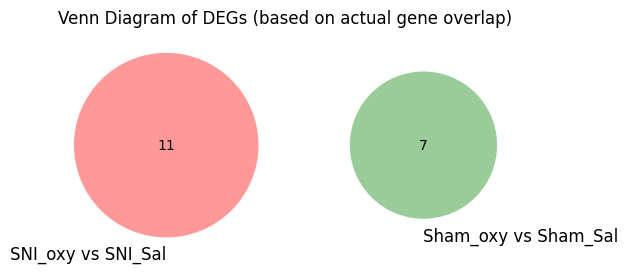

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# all DEGs from SNI_oxy vs SNI_Sal
sni_genes = {"ENSMUSG00000020914", 
             "ENSMUSG00000019464",	
             "ENSMUSG00000032532",	
             "ENSMUSG00000035202",	
             "ENSMUSG00000047485",	
             "ENSMUSG00000065922",	
             "ENSMUSG00000073119",	
             "ENSMUSG00000073867",	
             "ENSMUSG00000074782",	
             "ENSMUSG00000085315",	
             "ENSMUSG00000087644"}   
# all DEGs from Sham_oxy vs Sham_Sal
sham_genes = {
    "ENSMUSG00000021609",	
    "ENSMUSG00000026058",	
    "ENSMUSG00000030110",	
    "ENSMUSG00000040452",
    "ENSMUSG00000090546",	
    "ENSMUSG00000103497",
    "ENSMUSG00000106855"}           

# Compute counts
only_sni = len(sni_genes - sham_genes)
only_sham = len(sham_genes - sni_genes)
overlap = len(sni_genes & sham_genes)

plt.figure(figsize=(6,6))
venn2(subsets=(only_sni, only_sham, overlap),
      set_labels=('SNI_oxy vs SNI_Sal', 'Sham_oxy vs Sham_Sal'))
plt.title("Venn Diagram of DEGs (based on actual gene overlap)")
plt.show()